# TIME SERIES ANALYSIS - SARIMA Model


### Problem Statement

The data represents the number of employees in thousands of persons as monthly averages from January, 1990 to December 2018.This project predicts the number of employees in thousands of persons as monthly averages for the year 2019

In [1]:
# Imports
import pandas as pd
import numpy as np
%matplotlib inline

# Loading specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pandas.util._decorators import Appender
from pmdarima import auto_arima                              # for determining ARIMA orders

# Loading specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignoring harmless warnings
import warnings
warnings.filterwarnings("ignore")



### Data


In [2]:
# Loading datasets
df = pd.read_csv('../Data/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


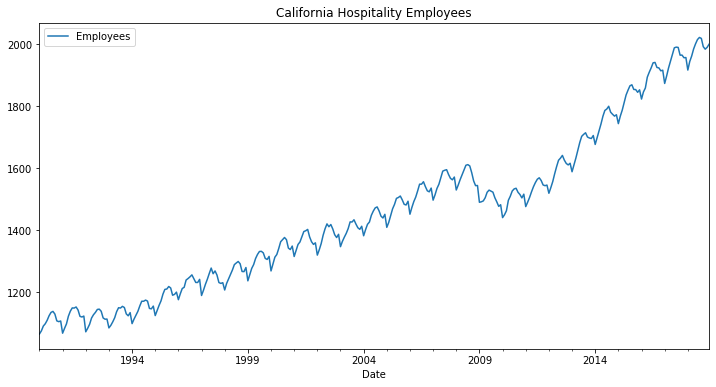

In [22]:
## Plotting the time series
df.plot(figsize=(12,6),title='California Hospitality Employees');

### Seasonal Decomposition

In [4]:
#Performing a Seasonal Decomposition on the model and plotting the ETS components
result=seasonal_decompose(df['Employees'])

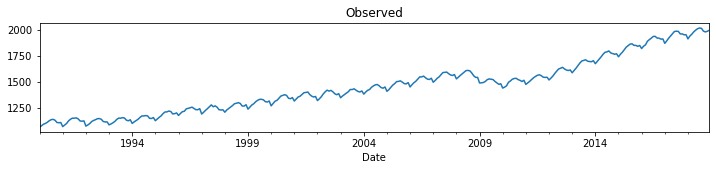

In [5]:
result.observed.plot(figsize=(12,2),title='Observed');

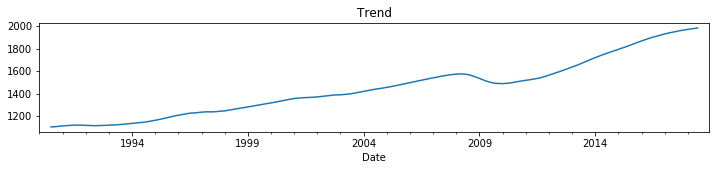

In [6]:
result.trend.plot(figsize=(12,2),title='Trend');

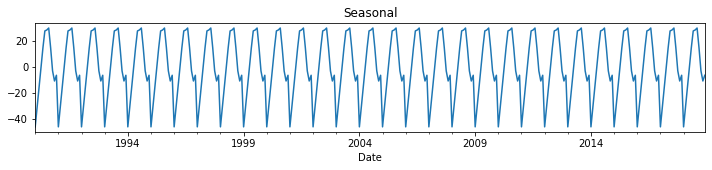

In [7]:
result.seasonal.plot(figsize=(12,2),title='Seasonal');

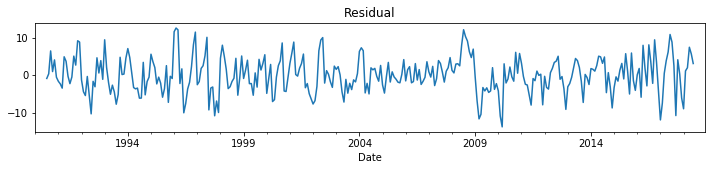

In [8]:
result.resid.plot(figsize=(12,2),title='Residual');

### ARIMA Orders

In [9]:
# Running pmdarima.auto_arima to obtain recommended orders
auto_arima(df['Employees'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.307
Date:                              Thu, 07 May 2020   AIC                           2210.614
Time:                                      21:33:09   BIC                           2237.559
Sample:                                           0   HQIC                          2221.343
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.005      0.081      0.936      -0.010       0.011
ar.L1          0.9222      0.046     20.112      0.000       0.832       1.012
ma.L1         -0.9438      0.070    -13.457      0.000      -1.081      -0.806
ma.L2          0.1316      0.060      2.201      0.028       0.014       0.249
ar.S.L12       0.9977      0.001    719.452      0.000       0.995       1.000
ma.S.L12      -0.7574      0.042    -17.930      0.000      -0.840      -0.675
sigma2        29.1948      1.702     17.154      0.000      25.859      32.531
===================================================================================
Ljung-Box (Q):                       32.12   Jarque-Bera (JB):                66.33
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.09
Prob(H) (two-sided):                  0.45   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Train Test Split

In [10]:
# length of the data set
len(df)

348

In [11]:
348-12

336

In [12]:
#Split the data into a train/test split where the test set is the last 12 months of data
train=df.iloc[:336]
test=df.iloc[336:]

### SARIMA Model 

In [13]:
#Fitting a SARIMA Model to the training set
model=SARIMAX(train['Employees'],order=(1, 1, 2),seasonal_order=(1, 0, 1, 12))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Thu, 07 May 2020   AIC                           2128.116
Time:                                      21:33:10   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.043     21.248      0.000       0.839       1.009
ma.L1         -0.9585      0.070    -13.687      0.000      -1.096      -0.821
ma.L2          0.1498      0.061      2.468      0.014       0.031       0.269
ar.S.L12       0.9973      0.001    728.627      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.159      0.000      -0.838      -0.666
sigma2        28.7642      1.684     17.078      0.000      25.463      32.065
===================================================================================
Ljung-Box (Q):                       29.90   Jarque-Bera (JB):                73.32
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Predicted Values

In [14]:
#calculating start and end values - parameters to predict
start=len(train)
end=len(train)+len(test)-1
len(test)

12

In [15]:
#predicting values
prediction=result.predict(start=start,end=end,typ='levels').rename('SARIMA Predictions')

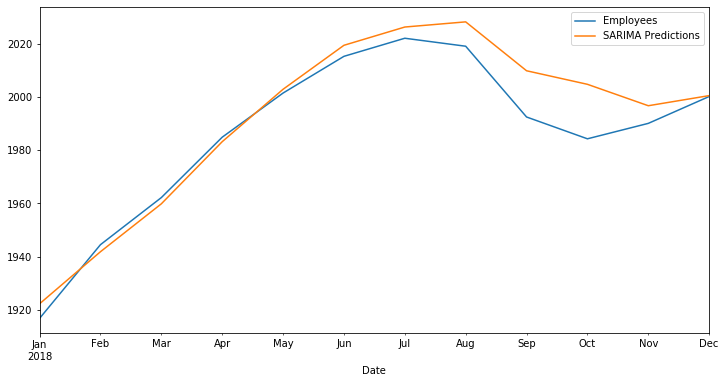

In [16]:
#Plotting predictions against values
test['Employees'].plot(figsize=(12,6),legend=True);
prediction.plot(legend=True);

###  Evaluation using MSE and RMSE


In [17]:
#mean squared error
error=mean_squared_error(test['Employees'],prediction)
print(f'SARIMA(1,1,2)(1,0,1,12) MSE Error: {error}' )

SARIMA(1,1,2)(1,0,1,12) MSE Error: 77.65505693310682


In [18]:
#root mean squared error
error=rmse(test['Employees'],prediction)
print(f'SARIMA(1,1,2)(1,0,1,12) RMSE Error: {error}' )

SARIMA(1,1,2)(1,0,1,12) RMSE Error: 8.812210672306174


### Forecast

In [19]:
#Retraining the model on the full data and forecasting one year into the future
model=SARIMAX(df['Employees'],order=(1,1,2),seasonal_order=(1,0,1,12))
result=model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Thu, 07 May 2020   AIC                           2208.504
Time:                                      21:33:12   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.561      0.000       0.836       1.013
ma.L1         -0.9441      0.070    -13.512      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.145      0.032       0.011       0.247
ar.S.L12       0.9972      0.001    701.330      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.322      0.000      -0.834      -0.664
sigma2        29.2969      1.717     17.064      0.000      25.932      32.662
===================================================================================
Ljung-Box (Q):                       31.48   Jarque-Bera (JB):                67.43
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Forecast

In [20]:
#predicting results
forecast=result.predict(start=len(df),end=len(df)+11,typ='levels').rename('SARIMA Forecast')

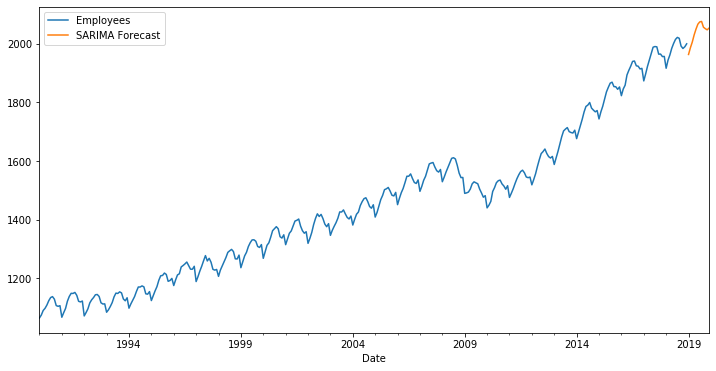

In [21]:
#Plotting the forecasted values along the original data
df['Employees'].plot(figsize=(12,6),legend=True);
forecast.plot(legend=True);